In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import warnings

In [2]:
spot_data = pd.read_csv('/home/saurav/Desktop/Questions/niftyspot2024Mar.csv')
option_data = pd.read_csv('/home/saurav/Desktop/Questions/cepe_Mar2024.csv')

/tmp/ipykernel_126990/1756123019.py:2: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  option_data = pd.read_csv('/home/saurav/Desktop/Questions/cepe_Mar2024.csv')


In [3]:
spot_data.rename(columns={'minute': 'datetime'}, inplace=True)
spot_data.drop(columns=['ticker'], inplace=True)
spot_data['datetime'] = pd.to_datetime(spot_data['datetime'])
spot_data = spot_data.set_index(spot_data['datetime'])
spot_data[['open', 'high', 'low', "close"]] = spot_data[['open', 'high', 'low', "close"]].astype(float)
spot_data.drop(columns=['datetime'],inplace=True)
spot_data = spot_data.reset_index()
spot_data['date'] = spot_data['datetime'].dt.date
spot_data['time'] = spot_data['datetime'].dt.time
spot_data = spot_data.set_index(spot_data['datetime'])
spot_data

,datetime,open,high,low,close,date,time
datetime,,,,,,,
2024-03-01 09:15:00+05:30,2024-03-01 09:15:00+05:30,22048.30,22125.65,22047.75,22117.25,2024-03-01,09:15:00
2024-03-01 09:16:00+05:30,2024-03-01 09:16:00+05:30,22117.55,22124.05,22117.50,22118.40,2024-03-01,09:16:00
2024-03-01 09:17:00+05:30,2024-03-01 09:17:00+05:30,22119.45,22122.40,22114.90,22114.90,2024-03-01,09:17:00
2024-03-01 09:18:00+05:30,2024-03-01 09:18:00+05:30,22113.65,22122.65,22112.35,22121.75,2024-03-01,09:18:00
2024-03-01 09:19:00+05:30,2024-03-01 09:19:00+05:30,22122.20,22123.40,22114.10,22114.95,2024-03-01,09:19:00
...,...,...,...,...,...,...,...
2024-03-28 15:25:00+05:30,2024-03-28 15:25:00+05:30,22321.60,22337.30,22318.80,22331.90,2024-03-28,15:25:00
2024-03-28 15:26:00+05:30,2024-03-28 15:26:00+05:30,22331.05,22332.85,22325.30,22326.85,2024-03-28,15:26:00
2024-03-28 15:27:00+05:30,2024-03-28 15:27:00+05:30,22328.05,22341.65,22324.65,22341.65,2024-03-28,15:27:00


In [4]:
option_data.rename(columns={'minute': 'datetime'}, inplace=True)
option_data.drop(columns=['openinterest'],inplace=True)
option_data['datetime'] = pd.to_datetime(option_data['datetime'])
option_data = option_data.set_index(option_data['datetime'])
option_data['date'] = option_data['datetime'].dt.date
option_data['time'] = option_data['datetime'].dt.time
option_data

,datetime,ticker,open,high,low,close,strike,side,expiry,date,time
datetime,,,,,,,,,,,
2024-03-01 09:15:00+05:30,2024-03-01 09:15:00+05:30,NIFTY2430719850PE,1.45,1.45,1.10,1.10,19850,PE,24307,2024-03-01,09:15:00
2024-03-01 09:16:00+05:30,2024-03-01 09:16:00+05:30,NIFTY2430719850PE,1.10,1.15,1.05,1.10,19850,PE,24307,2024-03-01,09:16:00
2024-03-01 09:17:00+05:30,2024-03-01 09:17:00+05:30,NIFTY2430719850PE,1.10,1.15,1.10,1.15,19850,PE,24307,2024-03-01,09:17:00
2024-03-01 09:18:00+05:30,2024-03-01 09:18:00+05:30,NIFTY2430719850PE,1.15,1.15,1.10,1.15,19850,PE,24307,2024-03-01,09:18:00
2024-03-01 09:19:00+05:30,2024-03-01 09:19:00+05:30,NIFTY2430719850PE,1.15,1.15,1.10,1.15,19850,PE,24307,2024-03-01,09:19:00
...,...,...,...,...,...,...,...,...,...,...,...
2024-03-28 15:25:00+05:30,2024-03-28 15:25:00+05:30,NIFTY24MAY24250CE,33.65,33.65,33.65,33.65,24250,CE,24MAY,2024-03-28,15:25:00
2024-03-28 15:26:00+05:30,2024-03-28 15:26:00+05:30,NIFTY24MAY24250CE,35.35,35.35,35.35,35.35,24250,CE,24MAY,2024-03-28,15:26:00
2024-03-28 15:27:00+05:30,2024-03-28 15:27:00+05:30,NIFTY24MAY24250CE,35.35,35.35,35.35,35.35,24250,CE,24MAY,2024-03-28,15:27:00


In [52]:
# Initialising DataFrame to log the trades
trades = pd.DataFrame(columns=["side", "sellprice", "ticker", "selltime", "qty", "date", "sl", "target", "pos", "strike", "buyprice", "buytime", "pnl", "reason", "original_sl", "tsl"])

dates = spot_data['date'].unique()

for date in dates:
    
    # Filtering the spot_data and option_data for the same date
    current_spot_data = spot_data[spot_data['date'] == date]
    current_option_data = option_data[option_data['date'] == date]
    
    # checking if current option data is not empty for the same date
    if current_option_data.empty:
        print(f"No option data for date {date}")
        continue
    
    exp = current_option_data.iloc[0]['ticker'][5:10]
    in_position = False
    td = {}

    for index, current_candle in current_spot_data.iterrows():
        if current_candle['time'] == dt.time(13, 0) and not in_position:
            print("Placing trade!")

            atm_strike = int(round(current_candle['open'] / 50, 0) * 50)
            required_strike_ce = atm_strike + 100
            required_strike_pe = atm_strike - 100

            opdata = {
                "CE": current_option_data[current_option_data['ticker'] == f"NIFTY{exp}{required_strike_ce}CE"],
                "PE": current_option_data[current_option_data['ticker'] == f"NIFTY{exp}{required_strike_pe}PE"]
            }

            # checking if opdata is not empty
            if opdata["CE"].empty or opdata["PE"].empty:
                print(f"Option data missing for {required_strike_ce}CE or {required_strike_pe}PE on date {date}")
                continue         
            # finding ce or pe premium for selling the option at 1 pm
            ce_sellprice = opdata["CE"].iloc[225]  
            pe_sellprice = opdata["PE"].iloc[225]

            td = {
                "CE": {
                    "side": "CE",
                    "sellprice": ce_sellprice["open"],
                    "ticker": ce_sellprice['ticker'],
                    "selltime": current_candle['time'],
                    "qty": 50,
                    "date": date,
                    "sl": ce_sellprice["open"] + (ce_sellprice["open"] * 30 / 100), # condition for 30% sl for ce
                    "original_sl": ce_sellprice["open"] + (ce_sellprice["open"] * 30 / 100),
                    "tsl": None,
                    "target": "open", 
                    "pos": True,
                    "strike": required_strike_ce
                },
                "PE": {
                    "side": "PE",
                    "sellprice": pe_sellprice["open"],
                    "ticker": pe_sellprice['ticker'],
                    "selltime": current_candle['time'],
                    "qty": 50,
                    "date": date,
                    "sl": pe_sellprice["open"] + (pe_sellprice["open"] * 30 / 100), # condition for 30% sl for pe
                    "original_sl": pe_sellprice["open"] + (pe_sellprice["open"] * 30 / 100),
                    "tsl": None,
                    "target": "open",  
                    "pos": True,
                    "strike": required_strike_pe
                }
            }
            in_position = True

        if in_position:
            for current_candle in opdata['CE'].itertuples():
                current_time = current_candle.time
                if dt.time(13, 0) <= current_time <= dt.time(15, 0):
                    for t in ['CE', 'PE']:
                        if td[t]['pos']:
                            if opdata[t].loc[current_candle.Index, 'high'] >= td[t]['sl']: #condition to check if sl hit 
                                td[t]['buyprice'] = td[t]['sl']
                                td[t]['buytime'] = current_time
                                td[t]['reason'] = "SL HIT"
                                td[t]['pnl'] = (td[t]['sellprice'] - td[t]['buyprice']) * td[t]['qty']
                                td[t]['tsl'] = td[t]['sl']
                                td[t]['pos'] = False
                                trades = trades.append(td[t], ignore_index=True)
                                in_position = False

                                # condition for tsl
                                T = 'PE' if t == 'CE' else 'CE'
                                if td[T]['pos']:
                                    td[T]['sl'] = td[T]['sellprice']
                                    td[T]['tsl'] = td[T]['sl']
                                    for candle_tsl in opdata[T][opdata[T]['time'] >= current_time].itertuples():
                                        sub_time = candle_tsl.time
                                        if sub_time <= dt.time(15, 0):
                                            if opdata[T].loc[candle_tsl.Index, 'high'] >= td[T]['sl']:
                                                td[T]['buyprice'] = td[T]['sl']
                                                td[T]['buytime'] = sub_time
                                                td[T]['reason'] = "TSL HIT"
                                                td[T]['pnl'] = (td[T]['sellprice'] - td[T]['buyprice']) * td[T]['qty']
                                                td[T]['pos'] = False
                                                trades = trades.append(td[T], ignore_index=True)
                                                in_position = False
                                                break
                                        elif sub_time == dt.time(15, 0):
                                            td[T]['buyprice'] = opdata[T].loc[candle_tsl.Index, 'close']
                                            td[T]['buytime'] = sub_time
                                            td[T]['reason'] = "Time Up"
                                            td[T]['pnl'] = (td[T]['sellprice'] - td[T]['buyprice']) * td[T]['qty']
                                            td[T]['pos'] = False
                                            trades = trades.append(td[T], ignore_index=True)
                                            in_position = False

                    # condition to close the open trade at 3 pm
                    for t in ['CE', 'PE']:
                        if td[t]['pos'] and current_time == dt.time(15, 0):
                            td[t]['buyprice'] = opdata[t].loc[current_candle.Index, 'close']
                            td[t]['buytime'] = current_time
                            td[t]['reason'] = "Time Up"
                            td[t]['pnl'] = (td[t]['sellprice'] - td[t]['buyprice']) * td[t]['qty']
                            td[t]['tsl'] = td[t]['sl']
                            td[t]['pos'] = False
                            trades = trades.append(td[t], ignore_index=True)
                            in_position = False


Placing trade!


/tmp/ipykernel_126990/546056919.py:125: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  trades = trades.append(td[t], ignore_index=True)
/tmp/ipykernel_126990/546056919.py:125: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  trades = trades.append(td[t], ignore_index=True)


Placing trade!


/tmp/ipykernel_126990/546056919.py:125: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  trades = trades.append(td[t], ignore_index=True)
/tmp/ipykernel_126990/546056919.py:125: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  trades = trades.append(td[t], ignore_index=True)


Placing trade!


/tmp/ipykernel_126990/546056919.py:125: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  trades = trades.append(td[t], ignore_index=True)
/tmp/ipykernel_126990/546056919.py:125: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  trades = trades.append(td[t], ignore_index=True)


Placing trade!


/tmp/ipykernel_126990/546056919.py:87: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  trades = trades.append(td[t], ignore_index=True)
/tmp/ipykernel_126990/546056919.py:125: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  trades = trades.append(td[t], ignore_index=True)


Placing trade!


/tmp/ipykernel_126990/546056919.py:87: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  trades = trades.append(td[t], ignore_index=True)
/tmp/ipykernel_126990/546056919.py:125: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  trades = trades.append(td[t], ignore_index=True)


Placing trade!


/tmp/ipykernel_126990/546056919.py:87: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  trades = trades.append(td[t], ignore_index=True)
/tmp/ipykernel_126990/546056919.py:125: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  trades = trades.append(td[t], ignore_index=True)


Placing trade!


/tmp/ipykernel_126990/546056919.py:87: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  trades = trades.append(td[t], ignore_index=True)
/tmp/ipykernel_126990/546056919.py:104: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  trades = trades.append(td[T], ignore_index=True)


Placing trade!


/tmp/ipykernel_126990/546056919.py:125: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  trades = trades.append(td[t], ignore_index=True)
/tmp/ipykernel_126990/546056919.py:125: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  trades = trades.append(td[t], ignore_index=True)


Placing trade!


/tmp/ipykernel_126990/546056919.py:87: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  trades = trades.append(td[t], ignore_index=True)
/tmp/ipykernel_126990/546056919.py:125: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  trades = trades.append(td[t], ignore_index=True)


Placing trade!


/tmp/ipykernel_126990/546056919.py:87: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  trades = trades.append(td[t], ignore_index=True)
/tmp/ipykernel_126990/546056919.py:104: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  trades = trades.append(td[T], ignore_index=True)


Placing trade!


/tmp/ipykernel_126990/546056919.py:125: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  trades = trades.append(td[t], ignore_index=True)
/tmp/ipykernel_126990/546056919.py:125: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  trades = trades.append(td[t], ignore_index=True)


Placing trade!


/tmp/ipykernel_126990/546056919.py:125: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  trades = trades.append(td[t], ignore_index=True)
/tmp/ipykernel_126990/546056919.py:125: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  trades = trades.append(td[t], ignore_index=True)


Placing trade!


/tmp/ipykernel_126990/546056919.py:87: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  trades = trades.append(td[t], ignore_index=True)
/tmp/ipykernel_126990/546056919.py:125: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  trades = trades.append(td[t], ignore_index=True)


Placing trade!


/tmp/ipykernel_126990/546056919.py:87: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  trades = trades.append(td[t], ignore_index=True)
/tmp/ipykernel_126990/546056919.py:104: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  trades = trades.append(td[T], ignore_index=True)


Placing trade!


/tmp/ipykernel_126990/546056919.py:87: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  trades = trades.append(td[t], ignore_index=True)
/tmp/ipykernel_126990/546056919.py:104: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  trades = trades.append(td[T], ignore_index=True)


Placing trade!


/tmp/ipykernel_126990/546056919.py:125: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  trades = trades.append(td[t], ignore_index=True)
/tmp/ipykernel_126990/546056919.py:125: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  trades = trades.append(td[t], ignore_index=True)


Placing trade!


/tmp/ipykernel_126990/546056919.py:125: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  trades = trades.append(td[t], ignore_index=True)
/tmp/ipykernel_126990/546056919.py:125: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  trades = trades.append(td[t], ignore_index=True)


Placing trade!


/tmp/ipykernel_126990/546056919.py:125: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  trades = trades.append(td[t], ignore_index=True)
/tmp/ipykernel_126990/546056919.py:125: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  trades = trades.append(td[t], ignore_index=True)


Placing trade!


/tmp/ipykernel_126990/546056919.py:87: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  trades = trades.append(td[t], ignore_index=True)
/tmp/ipykernel_126990/546056919.py:125: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  trades = trades.append(td[t], ignore_index=True)


In [53]:
trades

,side,sellprice,ticker,selltime,qty,date,sl,target,pos,strike,buyprice,buytime,pnl,reason,original_sl,tsl
0,CE,131.65,NIFTY2430722400CE,13:00:00,50,2024-03-01,171.145,open,False,22400,139.400,15:00:00,-387.50,Time Up,171.145,171.145
1,PE,119.10,NIFTY2430722200PE,13:00:00,50,2024-03-01,154.830,open,False,22200,98.600,15:00:00,1025.00,Time Up,154.830,154.830
2,CE,97.95,NIFTY2430722500CE,13:00:00,50,2024-03-02,127.335,open,False,22500,97.950,15:00:00,0.00,Time Up,127.335,127.335
3,PE,92.80,NIFTY2430722300PE,13:00:00,50,2024-03-02,120.640,open,False,22300,92.800,15:00:00,0.00,Time Up,120.640,120.640
4,CE,75.00,NIFTY2430722500CE,13:00:00,50,2024-03-04,97.500,open,False,22500,76.400,15:00:00,-70.00,Time Up,97.500,97.500
5,PE,89.65,NIFTY2430722300PE,13:00:00,50,2024-03-04,116.545,open,False,22300,84.600,15:00:00,252.50,Time Up,116.545,116.545
6,PE,62.30,NIFTY2430722300PE,13:00:00,50,2024-03-05,80.990,open,False,22300,80.990,13:52:00,-934.50,SL HIT,80.990,80.990
7,CE,56.35,NIFTY2430722500CE,13:00:00,50,2024-03-05,56.350,open,False,22500,41.400,15:00:00,747.50,Time Up,73.255,56.350
8,CE,49.45,NIFTY2430722350CE,13:00:00,50,2024-03-06,64.285,open,False,22350,64.285,13:39:00,-741.75,SL HIT,64.285,64.285
9,PE,32.45,NIFTY2430722150PE,13:00:00,50,2024-03-06,32.450,open,False,22150,9.400,15:00:00,1152.50,Time Up,42.185,32.450


In [18]:
trades.to_csv('trades.csv', index=False)

In [24]:
trades['date'] = pd.to_datetime(trades['date'])

trades_by_date = trades.groupby(['date', 'side']).agg(
    pnl=pd.NamedAgg(column='pnl', aggfunc='sum'),
    total_trades=pd.NamedAgg(column='pnl', aggfunc='count')
)
trades_by_date = trades_by_date.reset_index()
final_trades = trades_by_date.pivot(index='date', columns='side', values='pnl')
final_trades['total_pnl'] = final_trades['CE'] + final_trades['PE']

In [27]:
final_trades

side,CE,PE,total_pnl
date,,,
2024-03-01,-387.50,1025.00,637.50
2024-03-02,0.00,0.00,0.00
2024-03-04,-70.00,252.50,182.50
2024-03-05,747.50,-934.50,-187.00
2024-03-06,-741.75,1152.50,410.75
2024-03-07,-75.00,292.50,217.50
2024-03-11,0.00,-1098.00,-1098.00
2024-03-12,560.00,-52.50,507.50
2024-03-13,1995.00,-731.25,1263.75


In [28]:
overall_pnl = final_trades['total_pnl'].sum()
max_pnl_date = final_trades['total_pnl'].idxmax()
max_pnl = final_trades.loc[max_pnl_date, 'total_pnl']
min_pnl_date = final_trades['total_pnl'].idxmin()
min_pnl = final_trades.loc[min_pnl_date, 'total_pnl']

In [29]:
print("Overall P&L:", overall_pnl)
print("Max P&L Date:", max_pnl_date)
print("Max P&L:", max_pnl)
print("Min P&L Date:", min_pnl_date)
print("Min P&L:", min_pnl)

Overall P&L: 3141.0
Max P&L Date: 2024-03-13 00:00:00
Max P&L: 1263.7500000000002
Min P&L Date: 2024-03-28 00:00:00
Min P&L: -1405.2500000000002


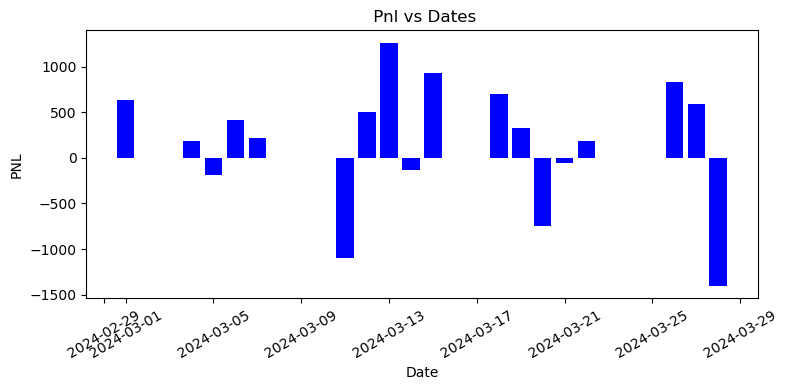

In [39]:
plt.figure(figsize=(8, 4))
plt.bar(final_trades.index, final_trades['total_pnl'], color='blue')
plt.title(' Pnl vs Dates')
plt.xlabel('Date')
plt.ylabel('PNL')
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

In [40]:
total_trades = len(trades)
win_trades = len(trades[trades['pnl'] > 0])
win_percentage = (win_trades / total_trades) * 100

In [41]:
print("Win %:", win_percentage)

Win %: 42.10526315789473


In [45]:
print("Average Daily Return:", (final_trades['total_pnl'].sum())/len(final_trades))

Average Daily Return: 165.31578947368422


In [51]:
# positive_pnl_mask = final_trades['total_pnl'] > 0
# negative_pnl_mask = final_trades['total_pnl'] < 0
# winning_streaks = positive_pnl_mask.groupby((~positive_pnl_mask.shift().fillna(False)).cumsum()).cumsum()
# losing_streaks = negative_pnl_mask.groupby((~negative_pnl_mask.shift().fillna(False)).cumsum()).cumsum()
# max_winning_streak = winning_streaks.max()
# max_losing_streak = losing_streaks.min()
# print("Maximum Winning Streak:", max_winning_streak)
